In [1]:
#pd.show_versions()

### Analyzing a DataSet (Seattle_AirBnB DataSet) by following the CRISP-DM - The standard Data Mining Processes

## 1. Business Understanding

### Three business questions were imposed on the provided dataset:
1. What neighbourhood got the highest price?
2. Is there a relationship between the (guest includedand) and the (rent price)?
3. does not verify the customer identity by picture and phone will affect the renting price?

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 2. Data Understanding

In [3]:
# DataSet Reading
df= pd.read_csv('Seattle_AirBnB.csv')

In [4]:
#Find the total number of rows and columns in the dataset.
df.shape

(3818, 72)

In [5]:
#Check the Clumns
df.columns

Index(['id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'host_id', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'numbe

In [6]:
# Use .info() to get some insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 72 columns):
id                                  3818 non-null int64
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
host_id                             3818 non-null int64
host_since                          3816 non-null object
host_location                       3810 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_neighbourhood                  3518

In [7]:
df.head(2)

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_since,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,11-08-11,...,9.0,10.0,f,NaN,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,21-02-13,...,10.0,10.0,f,NaN,f,strict,t,t,6,1.48


## 3. Data Preparation

In [8]:
# drop unwanted columns
df.drop(['name','summary','space','description','neighborhood_overview','notes','transit','host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_identity_verified','host_listings_count','host_location','host_total_listings_count','street', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'calendar_last_scraped', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'requires_license', 'license','first_review','last_review','calculated_host_listings_count','latitude','longitude','is_location_exact','market','amenities', 'city','state'],axis = 1, inplace= True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
id                                  3818 non-null int64
neighbourhood                       3402 non-null object
neighbourhood_cleansed              3818 non-null object
neighbourhood_group_cleansed        3818 non-null object
zipcode                             3811 non-null object
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
bed_type                            3818 non-null object
price                               3818 non-null object
guests_included                     3818 non-null int64
has_availability                    3818 non-null object
availability_30                     38

In [10]:
# Summing the missing values in the dataset
df.isna().sum()

id                                    0
neighbourhood                       416
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
zipcode                               7
property_type                         1
room_type                             0
accommodates                          0
bathrooms                            16
bedrooms                              6
beds                                  1
bed_type                              0
price                                 0
guests_included                       0
has_availability                      0
availability_30                       0
availability_60                       0
availability_90                       0
availability_365                      0
number_of_reviews                     0
review_scores_location              655
review_scores_value                 656
instant_bookable                      0
cancellation_policy                   0
require_guest_profile_picture         0


In [11]:
# Drop columns which have null values 
df1 = df.dropna(axis=1)

In [12]:
df1.isna().sum()

id                                  0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
room_type                           0
accommodates                        0
bed_type                            0
price                               0
guests_included                     0
has_availability                    0
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_reviews                   0
instant_bookable                    0
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
dtype: int64

In [13]:
#checking how many duplicated rows
sum(df1.duplicated())

0

In [14]:
#drop diplicated rows
#df1.drop_duplicates(inplace = True)

In [15]:
df1.head()

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,bed_type,price,guests_included,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,241032,West Queen Anne,Queen Anne,Entire home/apt,4,Real Bed,$85.00,2,t,14,41,71,346,207,f,moderate,f,f
1,953595,West Queen Anne,Queen Anne,Entire home/apt,4,Real Bed,$150.00,1,t,13,13,16,291,43,f,strict,t,t
2,3308979,West Queen Anne,Queen Anne,Entire home/apt,11,Real Bed,$975.00,10,t,1,6,17,220,20,f,strict,f,f
3,7421966,West Queen Anne,Queen Anne,Entire home/apt,3,Real Bed,$100.00,1,t,0,0,0,143,0,f,flexible,f,f
4,278830,West Queen Anne,Queen Anne,Entire home/apt,6,Real Bed,$450.00,6,t,30,60,90,365,38,f,strict,f,f


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
id                                  3818 non-null int64
neighbourhood_cleansed              3818 non-null object
neighbourhood_group_cleansed        3818 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bed_type                            3818 non-null object
price                               3818 non-null object
guests_included                     3818 non-null int64
has_availability                    3818 non-null object
availability_30                     3818 non-null int64
availability_60                     3818 non-null int64
availability_90                     3818 non-null int64
availability_365                    3818 non-null int64
number_of_reviews                   3818 non-null int64
instant_bookable                    3818 non-null object
cancellation_policy                 3818 non-n

In [17]:
df1.columns

Index(['id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'room_type', 'accommodates', 'bed_type', 'price', 'guests_included',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [18]:
df1.tail(5)

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,bed_type,price,guests_included,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
3813,8101950,Fremont,Other neighborhoods,Entire home/apt,6,Real Bed,$359.00,1,t,18,32,32,32,1,f,strict,f,f
3814,8902327,Portage Bay,Capitol Hill,Entire home/apt,4,Real Bed,$79.00,3,t,6,26,44,273,2,f,moderate,f,f
3815,10267360,Rainier Beach,Rainier Valley,Entire home/apt,2,Real Bed,$93.00,2,t,29,59,88,88,0,f,moderate,f,f
3816,9604740,Madison Park,Capitol Hill,Entire home/apt,2,Real Bed,$99.00,1,t,30,60,90,179,0,f,moderate,f,f
3817,10208623,East Queen Anne,Queen Anne,Entire home/apt,3,Real Bed,$87.00,1,t,7,7,7,7,0,f,flexible,f,f


## Answering The Business Questions (Evaluation and Data Modeling)

### 1. What neighbourhood got the highest renting price?

In [19]:
#Finding the neighbourhood with the highest renting price

HNP = df1.groupby("neighbourhood_group_cleansed", as_index=False)['price'].max().sort_values(by="price",ascending=False)
HNP

,neighbourhood_group_cleansed,price
6,Downtown,$999.00
0,Ballard,$99.00
9,Magnolia,$99.00
15,University District,$99.00
14,Seward Park,$99.00
13,Rainier Valley,$99.00
12,Queen Anne,$99.00
11,Other neighborhoods,$99.00
10,Northgate,$99.00
16,West Seattle,$99.00


In [20]:
# Removing the $ sign to be ablw to plot the price values

HNP['price'] = HNP['price'].str.replace("$", "")


In [21]:
HNP.head(2)

,neighbourhood_group_cleansed,price
6,Downtown,999.00
0,Ballard,99.00


In [22]:
HNP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 6 to 8
Data columns (total 2 columns):
neighbourhood_group_cleansed    17 non-null object
price                           17 non-null object
dtypes: object(2)
memory usage: 408.0+ bytes


In [23]:
# Changing the price type from object to float datatype 
HNP = HNP.astype({"price": float})

In [24]:
HNP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 6 to 8
Data columns (total 2 columns):
neighbourhood_group_cleansed    17 non-null object
price                           17 non-null float64
dtypes: float64(1), object(1)
memory usage: 408.0+ bytes


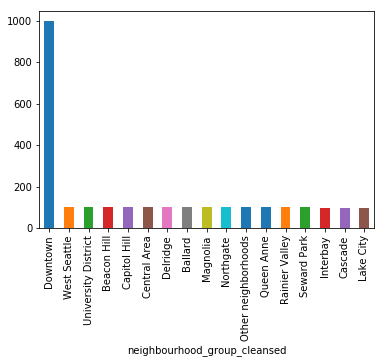

In [25]:
# PLOTTING THE HIEGHEST NEIGHBOURHOOD RENTING PRICE
HNP.groupby(['neighbourhood_group_cleansed'])['price'].max().sort_values(ascending=False).plot(kind='bar')


## Observation:  We can say thay DOWNTOWN has the highest renting price.

# . . . 

### 2. Is there a relationship between the (guest included) and the (rent price)?

In [26]:
guest_price = df1[["guests_included", "price"]]
guest_price.head(2)

,guests_included,price
0,2,$85.00
1,1,$150.00


In [27]:
guest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
guests_included    3818 non-null int64
price              3818 non-null object
dtypes: int64(1), object(1)
memory usage: 59.7+ KB


In [28]:
guest_price = guest_price[guest_price['price'].notnull()].copy()
guest_price['price'] = guest_price['price'].str.replace("$", "")

In [29]:
guest_price.head(2)

,guests_included,price
0,2,85.00
1,1,150.00


In [30]:
try:
    guest_price['price'] = guest_price['price'].astype(float)

except Exception as e:
    print(e)

could not convert string to float: '1,000.00 '


In [31]:
guest_price.drop(guest_price[guest_price['price'] == "1,000.00 "].index, inplace = True)

In [32]:
#Testing the dataset again
try:
    guest_price['price'] = guest_price['price'].astype(float)

except Exception as e:
    print(e)

In [33]:
guest_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 2 columns):
guests_included    3817 non-null int64
price              3817 non-null float64
dtypes: float64(1), int64(1)
memory usage: 89.5 KB


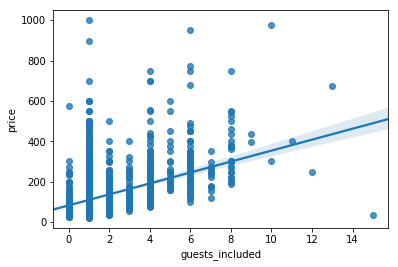

In [34]:
sns.regplot(x='guests_included', y='price', data=guest_price)

## Observation: we can saY that there is a (direct) relationship between number of guests included and the renting price.

### 3.  will hosts provide lower renting price if they make it mandatory for customers to verify their identity by picture or phone?


In [35]:
v = df1[["require_guest_profile_picture", "require_guest_phone_verification", "price"]]
v.head()

,require_guest_profile_picture,require_guest_phone_verification,price
0,f,f,$85.00
1,t,t,$150.00
2,f,f,$975.00
3,f,f,$100.00
4,f,f,$450.00


In [36]:
v = v[v['require_guest_phone_verification'].notnull()].copy()

In [37]:
#v.require_guest_phone_verification.replace(['t', 'f'], [1, 0], inplace=True)

v = v.replace(to_replace ="t", value ="1")
v = v.replace(to_replace ="f", value ="0")
v.head(7)

,require_guest_profile_picture,require_guest_phone_verification,price
0,0,0,$85.00
1,1,1,$150.00
2,0,0,$975.00
3,0,0,$100.00
4,0,0,$450.00
5,0,0,$120.00
6,0,0,$80.00


In [38]:
v['require_guest_profile_picture'] = v['require_guest_profile_picture'].astype(float)

In [39]:
v['require_guest_phone_verification'] = v['require_guest_phone_verification'].astype(float)

In [40]:
v = v[v['price'].notnull()].copy()
v['price'] = v['price'].str.replace("$", "")
v.drop(v[v['price'] == "1,000.00 "].index, inplace = True)
v['price'] = v['price'].astype(float)

In [41]:
v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 3 columns):
require_guest_profile_picture       3817 non-null float64
require_guest_phone_verification    3817 non-null float64
price                               3817 non-null float64
dtypes: float64(3)
memory usage: 119.3 KB


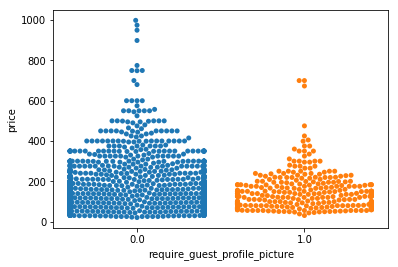

In [42]:
sns.swarmplot(x='require_guest_profile_picture',y='price', data=v)

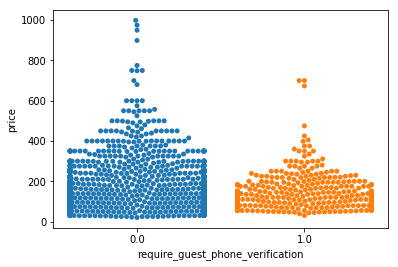

In [50]:
sns.swarmplot(x='require_guest_phone_verification',y='price', data=v)

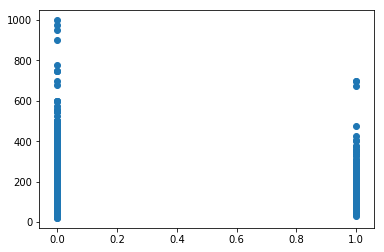

In [44]:
x = v.require_guest_profile_picture
y = v.price

plt.scatter(x, y)
plt.show()

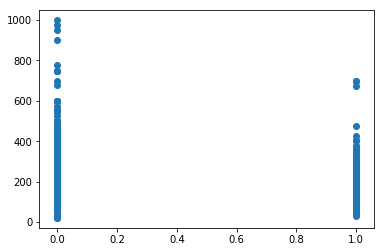

In [49]:
x = v.require_guest_phone_verification
y = v.price

plt.scatter(x, y)
plt.show()

## Observation: We can see that the majority of customers do not provide verification neither through phone or profile picture, and this affect the renting price directly. 